# Objective:
      
      1.Definition:We would like to classify the patients to be healthy 
      or suffering from cardiovascular disease based on given attributes  
      2.Target Variable: "cardio" denotes that patient do/don't have chance to get the disease
      3.Curate the data (Data Sanity Check),exploratory data analysis,treat the data
      4.Variable creation and variable reduction
      5.model building and model validation
      6.providing the model recommendations
      7.Model Deployment to Azure service
      8.Google collabe integration

In [2]:
#For Basic Python Operations
import numpy as np # to perform numerical operations
import pandas as pd # for data manipulations and data agrregations
import matplotlib.pyplot as plt # for visualization
import seaborn as sns 
#For Regression Analysis
from sklearn.linear_model import LinearRegression #  To Build regression algo
import statsmodels.api as sm # to build the statstical models
from sklearn.model_selection import train_test_split # to divide the data into train and test
import sklearn.metrics

#loading dataset to jupyter notebook and assigning it to pandas object

In [3]:
heart = pd.read_excel(r"C:\Users\anant\Documents\MLDataSets\CardioVascularDisease\CardioVascularDisease\cardiotrain1.xlsx")

#Displaying random 10 records to get the idea of the variables and its data

In [4]:
heart.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


#Displaying the dimensions of the data

In [5]:
heart.shape

(69301, 13)

#dropping the id variable as it is not required for analysis

In [8]:
heart1=heart.drop(["id"],axis=1)

In [9]:
#Getting the basic info of the data

In [10]:
heart1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 12 columns):
age            69301 non-null int64
gender         69301 non-null int64
height         69301 non-null int64
weight         69301 non-null float64
ap_hi          69301 non-null int64
ap_lo          69301 non-null int64
cholesterol    69301 non-null int64
gluc           69301 non-null int64
smoke          69301 non-null int64
alco           69301 non-null int64
active         69301 non-null int64
cardio         69301 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.3 MB


#checking for null values

In [7]:
heart1.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

#checking for dulplicate values

In [8]:
heart1.duplicated().sum()

24

In [9]:
heart1.shape

(69301, 12)

#Dropping the duplicate values

In [10]:
heart2=heart1.drop_duplicates(keep="last")

In [11]:
heart2.shape

(69277, 12)

#Getting the statistical analyis of data

In [12]:
heart2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69277.0,19468.871415,2467.386017,10798.0,17665.0,19704.0,21326.0,23713.0
gender,69277.0,1.349597,0.476846,1.0,1.0,1.0,2.0,2.0
height,69277.0,164.362140,8.206439,55.0,159.0,165.0,170.0,250.0
weight,69277.0,74.205884,14.384935,10.0,65.0,72.0,82.0,200.0
ap_hi,69277.0,128.832787,154.802512,-150.0,120.0,120.0,140.0,16020.0
ap_lo,69277.0,96.656004,189.128722,-70.0,80.0,80.0,90.0,11000.0
cholesterol,69277.0,1.366933,0.680354,1.0,1.0,1.0,2.0,3.0
gluc,69277.0,1.226525,0.572330,1.0,1.0,1.0,1.0,3.0
smoke,69277.0,0.088081,0.283415,0.0,0.0,0.0,0.0,1.0
alco,69277.0,0.053900,0.225821,0.0,0.0,0.0,0.0,1.0


#Code to detect outliers and handle with IQR method
Def:An outlier is a data point that differs significantly from other observations.
we need to handle them

In [13]:
def outlier_cal(data):
    col=list(data.columns)
    for i in col:
        if(data[i].nunique()> 2):
            iqr=data[i].quantile(0.75)-data[i].quantile(0.25)
            lo=data[i].quantile(0.25)-(1.5*iqr)
            uo=data[i].quantile(0.75)+(1.5*iqr)
            data[i]=np.where(data[i]>uo,uo,data[i])
            data[i]=np.where(data[i]<lo,lo,data[i])
    return data

#Applying the outliers method and getting statistical analysis

In [14]:
heart3=outlier_cal(data=heart2)
heart3.describe().T

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,count,mean,std,min,25%,50%,75%,max
age,69277.0,19468.946404,2467.144503,12173.5,17665.0,19704.0,21326.0,23713.0
gender,69277.0,1.349597,0.476846,1.0,1.0,1.0,2.0,2.0
height,69277.0,164.409653,7.824602,142.5,159.0,165.0,170.0,186.5
weight,69277.0,73.926940,13.438188,39.5,65.0,72.0,82.0,107.5
ap_hi,69277.0,126.706497,16.386750,90.0,120.0,120.0,140.0,170.0
ap_lo,69277.0,81.778354,9.062659,65.0,80.0,80.0,90.0,105.0
cholesterol,69277.0,1.366933,0.680354,1.0,1.0,1.0,2.0,3.0
gluc,69277.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
smoke,69277.0,0.088081,0.283415,0.0,0.0,0.0,0.0,1.0
alco,69277.0,0.053900,0.225821,0.0,0.0,0.0,0.0,1.0


In [15]:
def influnce_check(data,depdent_col):
    col=list(data.columns)
    for i in col:
        if data[i].dtypes!="object":
            from scipy.stats import ttest_ind
            abc_p=ttest_ind(data[data[depdent_col]==0][i],data[data[depdent_col]==1][i])[1]
            abc_s=ttest_ind(data[data[depdent_col]==0][i],data[data[depdent_col]==1][i])[0]
            print("importance",i,"values are",abc_p)
            print("static",i,"values are",abc_s)
            print("\n")

In [16]:
influnce_check(heart3,depdent_col="cardio")

importance age values are 0.0
static age values are -64.52907033974354


importance gender values are 0.024939023168575058
static gender values are -2.242394715971127


importance height values are 0.0010338707619484658
static height values are 3.281282970721003


importance weight values are 0.0
static weight values are -49.69032412820449


importance ap_hi values are 0.0
static ap_hi values are -127.06115727188184


importance ap_lo values are 0.0
static ap_lo values are -100.17493838136926


importance cholesterol values are 0.0
static cholesterol values are -59.56374263052398


importance gluc values are nan
static gluc values are nan


importance smoke values are 5.8206943454688876e-05
static smoke values are 4.020213331530362


importance alco values are 0.05625938604834879
static alco values are 1.9090529708299018


importance active values are 6.967734264366523e-21
static active values are 9.377245319486933


importance cardio values are 0.0
static cardio values are -inf




C:\Users\anant\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\anant\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\anant\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#Getting the visual representation of correlation between independent variables using heatmap

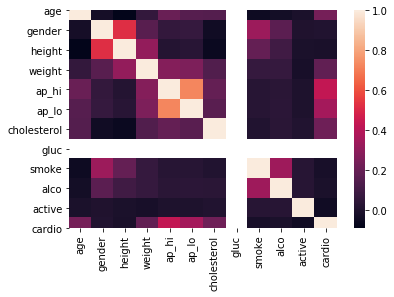

In [17]:
sns.heatmap(heart3.corr())

In [18]:
heart3.corr()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
age,1.000000,-0.023110,-0.086388,0.060151,0.209463,0.156061,0.154350,NaN,-0.047711,-0.029457,-0.009902,0.238118
gender,-0.023110,1.000000,0.521935,0.162914,0.061801,0.067297,-0.036429,NaN,0.337604,0.170998,0.006293,0.008519
height,-0.086388,0.521935,1.000000,0.316033,0.016551,0.030393,-0.054948,NaN,0.196071,0.097680,-0.007679,-0.012466
weight,0.060151,0.162914,0.316033,1.000000,0.274843,0.258940,0.143760,NaN,0.069055,0.068291,-0.017234,0.185515
ap_hi,0.209463,0.061801,0.016551,0.274843,1.000000,0.725925,0.196315,NaN,0.027482,0.032630,0.002714,0.434745
ap_lo,0.156061,0.067297,0.030393,0.258940,0.725925,1.000000,0.165130,NaN,0.027266,0.040709,0.001958,0.355709
cholesterol,0.154350,-0.036429,-0.054948,0.143760,0.196315,0.165130,1.000000,NaN,0.010179,0.035973,0.009724,0.220723
gluc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoke,-0.047711,0.337604,0.196071,0.069055,0.027482,0.027266,0.010179,NaN,1.000000,0.339692,0.025806,-0.015273
alco,-0.029457,0.170998,0.097680,0.068291,0.032630,0.040709,0.035973,NaN,0.339692,1.000000,0.025756,-0.007253


#Assigning correlation information to variable

In [19]:
heart3_corr=heart3.corr()

#Getting the list of variable where its correlation with dependent variable is greater than 0.01(cutoff value)

In [20]:
abc=list(heart3_corr[abs(heart3_corr["cardio"])>0.01].index)

In [21]:
abc

['age',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'smoke',
 'active',
 'cardio']

In [22]:
heart4=heart3[['age',
 'height',
 'weight',
 'ap_hi',
 'ap_lo',
 'cholesterol',
 'smoke',
 'active',
 'cardio']]

In [23]:
heart4.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,smoke,active,cardio
0,22469.0,155.0,69.0,130.0,80.0,2.0,0,1,0
1,14648.0,163.0,71.0,110.0,70.0,1.0,0,1,1
2,21901.0,165.0,70.0,120.0,80.0,1.0,0,1,0
3,14549.0,165.0,85.0,120.0,80.0,1.0,1,1,0
4,23393.0,155.0,62.0,120.0,80.0,1.0,0,1,0


#Seperating dependent variable

In [24]:
heart4_ind=heart4.drop(["cardio"],axis=1)
heart4_dep=heart4["cardio"]

#Applying the decision tree classifier to to get the feature importances of independent variables
with dependent variables

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(heart4_ind,heart4_dep)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
abc=pd.DataFrame(list(zip(heart4_ind.columns,dt.feature_importances_)),columns=["var","imp"])

In [14]:
#Checking the feature importances for each independent variable

In [27]:
abc

,var,imp
0,age,0.348473
1,height,0.157225
2,weight,0.160698
3,ap_hi,0.230971
4,ap_lo,0.041577
5,cholesterol,0.036500
6,smoke,0.010518
7,active,0.014038


#Code to caluclate the Variance influence factor(VIF) 

In [16]:
import statsmodels.formula.api as sm

def vif_cal(input_data, dependent_col):
    x_vars=input_data.copy()
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

#Applying the VIF method to data and drop the variable with highest value 

In [29]:
vif_cal(input_data=heart4_ind,dependent_col=heart4_dep)

age  VIF =  1.07
height  VIF =  1.18
weight  VIF =  1.24
ap_hi  VIF =  2.21
ap_lo  VIF =  2.13
cholesterol  VIF =  1.07
smoke  VIF =  1.04
active  VIF =  1.0


In [30]:
heart4.drop(["ap_hi"],axis=1,inplace=True)

C:\Users\anant\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
list(heart4.columns)

['age',
 'height',
 'weight',
 'ap_lo',
 'cholesterol',
 'smoke',
 'active',
 'cardio']

#Splitting Into train test before applying regression techniques

In [32]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(heart4,test_size=0.2,random_state=0)
print(train.shape,test.shape)

(55421, 8) (13856, 8)


#Applying Logistic regression using statsmodels
#Displaying summary stats to analyze the performance of the model

In [33]:
import statsmodels.formula.api as sm
model=sm.logit(formula="cardio~age+height+weight+ap_lo+cholesterol+smoke+active",data=train).fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.589134
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.150     
Dependent Variable: cardio           AIC:              65316.8004
Date:               2020-05-17 18:23 BIC:              65388.1821
No. Observations:   55421            Log-Likelihood:   -32650.   
Df Model:           7                LL-Null:          -38415.   
Df Residuals:       55413            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
-----------------------------------------------------------------
Intercept       -9.9563   0.2449 -40.6487 0.0000 -10.4363 -9.4762
age              0.0002   0.0000  40.0202 0.0000   0.0002  0.0002
height          -0.0075   0.0013  -5.6987 0.0000  -0.0101 -0.0049
weight           0.0168   0.0008  21.4358 0.0000   0.0153  0.0184
ap_lo            0.0776   0.0012  64.1137 0.0000   0.0753  0.0800
cholesterol      0.5025   0.0151  33.3541 0.0000   0.4729  0.5320
smoke           -0.1455   0.0342  -4.2559 0.0000  -0.2125 -0.0785
active          -0.2129   0.0238  -8.9594 0.0000  -0.2595 -0.1663
=================================================================

"""

#Predicting the values using Logistic regression and assigning to pred variable

In [34]:
train["pred"]=np.where(model.predict()>=0.5,1,0)

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
train.head()

,age,height,weight,ap_lo,cholesterol,smoke,active,cardio,pred
17361,15849.0,159.0,63.0,90.0,2.0,0,1,1,1
17041,18930.0,170.0,70.0,80.0,1.0,0,1,0,0
45605,20296.0,165.0,83.0,80.0,3.0,0,1,1,1
5675,14465.0,165.0,63.0,80.0,1.0,0,1,0,0
27753,19668.0,174.0,89.0,80.0,2.0,0,0,1,1


#Displaying accuracy of the logistic regression model

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(train["cardio"],train["pred"])

0.6989408347016474

#ROC and AUC curves to find sensitivity vs specificity and to find how accurate the model is in predicting positives as positives 
#Here we got roc curve of 69 % which means logistic regression model has predicted 69% of true as true

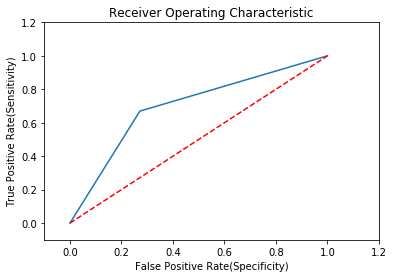

0.6989211252995795

In [37]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = train["cardio"]
predicted_values1=train["pred"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

#Predicting the values using test data to validate how accurate our model performs

In [38]:
test["pred"]=np.where(model.predict(test)>=0.5,1,0)

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
test.head()

,age,height,weight,ap_lo,cholesterol,smoke,active,cardio,pred
34059,19024.0,170.0,75.0,90.0,3.0,0,1,0,1
11562,18404.0,147.0,84.0,80.0,1.0,0,1,0,0
637,20585.0,163.0,89.0,90.0,3.0,0,1,0,1
23372,18940.0,173.0,73.0,80.0,1.0,0,1,0,0
14123,22231.0,158.0,68.0,90.0,1.0,0,0,0,1


In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(test["cardio"],test["pred"])

0.6985421478060047

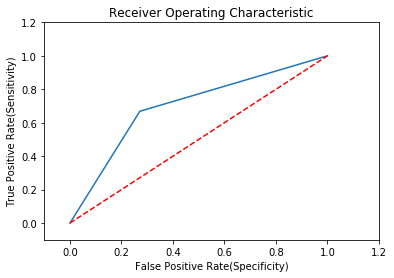

0.6985203749246909

In [41]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = test["cardio"]
predicted_values1=test["pred"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

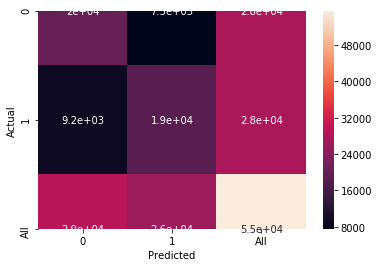

In [42]:
df = pd.DataFrame(train, columns=['cardio','pred'])
confusion_matrix = pd.crosstab(df['cardio'], df['pred'], rownames=['Actual'], colnames=['Predicted'], margins = True)

sns.heatmap(confusion_matrix, annot=True)
plt.show()

In [43]:
train.head()
train_ind = train.drop(["cardio","pred"],axis=1)
train_dep = train["cardio"]


In [44]:
train_ind

,age,height,weight,ap_lo,cholesterol,smoke,active
17361,15849.0,159.0,63.0,90.0,2.0,0,1
17041,18930.0,170.0,70.0,80.0,1.0,0,1
45605,20296.0,165.0,83.0,80.0,3.0,0,1
5675,14465.0,165.0,63.0,80.0,1.0,0,1
27753,19668.0,174.0,89.0,80.0,2.0,0,0
...,...,...,...,...,...,...,...
21258,22561.0,158.0,54.0,80.0,1.0,0,1
45913,15312.0,176.0,84.0,70.0,1.0,0,1
42635,21633.0,168.0,67.0,80.0,1.0,0,0
43589,22658.0,156.0,57.0,100.0,1.0,0,1


#Applying Decision Tree Algorithem on the data to check if it performs better than logistic regression

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=8)
dt.fit(train_ind,train_dep)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
train["dt_pred"]=dt.predict(train_ind)

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


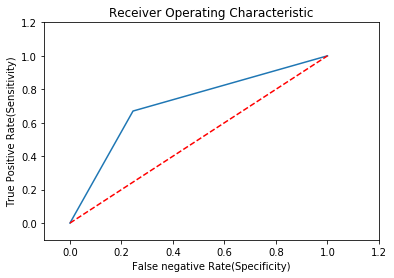

0.7124631696824553

In [47]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = train["cardio"]
predicted_values1=train["dt_pred"]
false_negative_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_negative_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False negative Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_negative_rate, true_positive_rate)
roc_auc

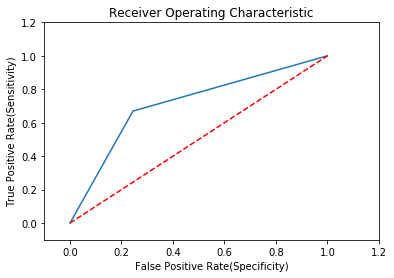

0.7124631696824553

In [48]:
######ROC AND AUC For Fiber bits model #########
###for visualising the plots use matplotlib and import roc_curve,auc from sklearn.metrics 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = train["cardio"]
predicted_values1=train["dt_pred"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predicted_values1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

###Area under Curve-AUC
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [49]:
dt.score(train_ind,train_dep)

0.7124916547878963

In [50]:
test_ind = test.drop(["pred","cardio"],axis=1)
test_dep=test["cardio"]

In [51]:
dt.score(test_ind,test_dep)

0.7051096997690531

In [52]:
test_ind.head()

,age,height,weight,ap_lo,cholesterol,smoke,active
34059,19024.0,170.0,75.0,90.0,3.0,0,1
11562,18404.0,147.0,84.0,80.0,1.0,0,1
637,20585.0,163.0,89.0,90.0,3.0,0,1
23372,18940.0,173.0,73.0,80.0,1.0,0,1
14123,22231.0,158.0,68.0,90.0,1.0,0,0


In [53]:
for i in range(2,20):
    dt1=DecisionTreeClassifier(max_depth=i)
    dt1.fit(train_ind,train_dep)
    print("test_accuracy",i,"iteration values",dt1.score(test_ind,test_dep))
    

test_accuracy 2 iteration values 0.670756351039261
test_accuracy 3 iteration values 0.6887990762124712
test_accuracy 4 iteration values 0.703377598152425
test_accuracy 5 iteration values 0.7031610854503464
test_accuracy 6 iteration values 0.7016454965357968
test_accuracy 7 iteration values 0.704243648960739
test_accuracy 8 iteration values 0.7050375288683602
test_accuracy 9 iteration values 0.7033054272517321
test_accuracy 10 iteration values 0.7015011547344111
test_accuracy 11 iteration values 0.6968100461893765
test_accuracy 12 iteration values 0.6903146651270208
test_accuracy 13 iteration values 0.688366050808314
test_accuracy 14 iteration values 0.6837471131639723
test_accuracy 15 iteration values 0.6765300230946882
test_accuracy 16 iteration values 0.6714058891454965
test_accuracy 17 iteration values 0.6688799076212472
test_accuracy 18 iteration values 0.6568995381062356
test_accuracy 19 iteration values 0.6492494226327945


In [54]:
print("test_accuracy",dt.score(train_ind,train_dep))
print("train_accuracy",dt.score(test_ind,test_dep))

test_accuracy 0.7124916547878963
train_accuracy 0.7051096997690531


In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=8)
rf.fit(train_ind,train_dep)

C:\Users\anant\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
rf.score(train_ind,train_dep)

0.7136103643023403

In [57]:
rf.score(test_ind,test_dep)

0.7048931870669746

In [58]:
from sklearn.model_selection import GridSearchCV
param_grid={'max_depth':np.arange(3,20)}
tree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10)
tree.fit(train_ind,train_dep)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
             pre_di

In [59]:
tree.best_params_

{'max_depth': 7}

In [60]:
train["pred_rf"]=rf.predict(train_ind)

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [61]:
train.head()

,age,height,weight,ap_lo,cholesterol,smoke,active,cardio,pred,dt_pred,pred_rf
17361,15849.0,159.0,63.0,90.0,2.0,0,1,1,1,1,1
17041,18930.0,170.0,70.0,80.0,1.0,0,1,0,0,0,0
45605,20296.0,165.0,83.0,80.0,3.0,0,1,1,1,1,1
5675,14465.0,165.0,63.0,80.0,1.0,0,1,0,0,0,0
27753,19668.0,174.0,89.0,80.0,2.0,0,0,1,1,1,1


In [62]:
test["pred_rf"]=rf.predict(test_ind)

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


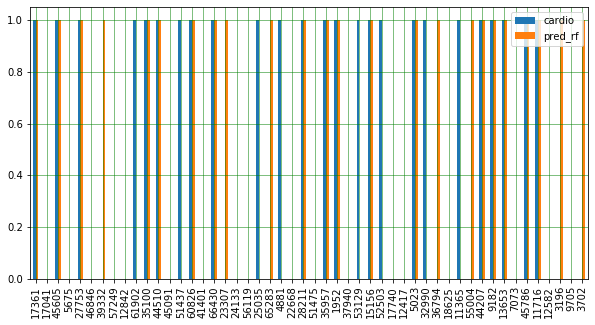

In [63]:
train1=train[["cardio","pred_rf"]]
train1 = train1.head(50)
train1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

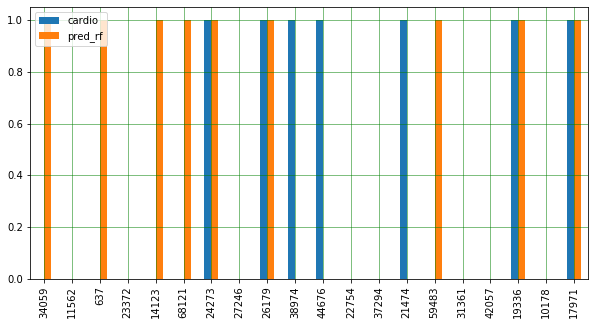

In [64]:
test1=test[["cardio","pred_rf"]]
test1 = test1.head(20)
test1.plot(kind='bar',figsize=(10,5))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [65]:
from sklearn.metrics import confusion_matrix

#for Random forest

In [66]:
confusion_matrix(train['cardio'], train['pred_rf'])

array([[21211,  6518],
       [ 9354, 18338]], dtype=int64)

#for decison tree

In [67]:
confusion_matrix(train['cardio'],train['dt_pred'])

array([[20939,  6790],
       [ 9144, 18548]], dtype=int64)

#for Logistic Regression

In [68]:
confusion_matrix(train['cardio'],train['pred'])

array([[20199,  7530],
       [ 9155, 18537]], dtype=int64)

In [69]:
train['cardio'].value_counts()

0    27729
1    27692
Name: cardio, dtype: int64

In [70]:
# for Train data
#Random forest
#TP= 18552
#TN= 20989
#FP= 6740
#FN= 9140

#Decison tree
#TP = 18548
#TN =20939
#FP = 6790
#FN = 9144

#Logistic Regression
#TP = 18537
#TN = 20199
#FP = 7530
#FN = 9155

In [71]:
test.head()

,age,height,weight,ap_lo,cholesterol,smoke,active,cardio,pred,pred_rf
34059,19024.0,170.0,75.0,90.0,3.0,0,1,0,1,1
11562,18404.0,147.0,84.0,80.0,1.0,0,1,0,0,0
637,20585.0,163.0,89.0,90.0,3.0,0,1,0,1,1
23372,18940.0,173.0,73.0,80.0,1.0,0,1,0,0,0
14123,22231.0,158.0,68.0,90.0,1.0,0,0,0,1,1


In [72]:
test['pred_dt']=dt.predict(test_ind)

C:\Users\anant\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
#for Random forest test

In [74]:
confusion_matrix(test['cardio'],test['pred_rf'])

array([[5234, 1699],
       [2390, 4533]], dtype=int64)

In [75]:
#for decision tree

In [76]:
confusion_matrix(test['cardio'],test['pred_dt'])

array([[5181, 1752],
       [2334, 4589]], dtype=int64)

In [77]:
#for logistic Regression

In [78]:
confusion_matrix(test['cardio'],test['pred'])

array([[5052, 1881],
       [2296, 4627]], dtype=int64)

In [79]:
# for test data
#Random forest
#TP= 4591
#TN= 5186
#FP= 1747
#FN= 2332

#Decison tree
#TP = 4588
#TN =5181
#FP = 1752
#FN = 2332

#Logistic Regression
#TP = 4627
#TN = 5052
#FP = 1881
#FN = 2296

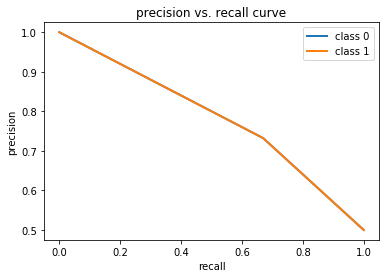

In [88]:
# precision recall curve for decision tree
from sklearn.metrics import precision_recall_curve
n_classes = len(set(train['cardio']))
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(train['cardio'],
                                                        train['dt_pred'])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

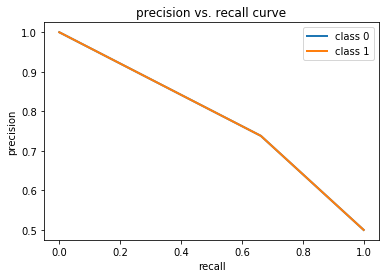

In [89]:
# precision recall curve for random forest
n_classes = len(set(train['cardio']))
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(train['cardio'],
                                                        train['pred_rf'])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

#Summary
#ConfusionMatrix for Logistic Regression

In [85]:
abc= model.pred_table()
cm_df=pd.DataFrame(abc)
cm_df.columns=['Predicted 0', 'Predicted 1']
cm_df=cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,20199.0,7530.0
Actual 1,9155.0,18537.0


#We choose Logistic Regression as the models's accuracy and precison rate is better in both train and test compared to other models